In [2]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [3]:
import numpy as np
import pandas as pd
from scipy.spatial import KDTree
from scipy.stats import expon
import math

import matplotlib.pyplot as plt

from copy import deepcopy

import pickle

In [4]:
x_goal = np.array([0.9, 0.9])

In [5]:
# r_n function
def r(n, D):
    return (n ** (-1/(2*D))) / 5 

In [6]:
def SampleFree(n, d, distr='unif'):
    assert distr in {'unif', 'pois'}, "distr parameter must be one of the following: 'unif', 'pois'"
    
    # start with init point (index 0)
    V = []
    
    for i in range(n):
        
        if distr is 'unif':
            V.append(np.random.uniform(size=d))
        else:
            pass       # later functionality for poisson process sampling
        
    # add the goal point (index n + 1)
    #V.append(x_goal)
    
    return V

In [7]:
distances = []
S_n = []
counts = []

#g = open('slurm scripts/data/06-24-20/asymptotics-dim2_n50000.out', 'r')
#for line in g:
#    distances.append(float(line))

filename = 'slurm scripts/data/06-24-20/path_points/'
for i in range(1,501):
    #if distances[i] == float('inf'):
    #    S_n.append(float('inf'))
    #    continue
    f = open(filename+str(i)+'-dim2-n50000_pathpoints.pkl', "rb")
    pathpoints = pickle.load(f)
    s_n = 0
    for j in range(len(pathpoints)-2):
        s_n += np.linalg.norm(pathpoints[j+1] - pathpoints[j])
    S_n.append(s_n)
    distances.append(s_n + np.linalg.norm(pathpoints[-1] - pathpoints[-2]))
    counts.append(len(pathpoints)-2)
    
    if pathpoints[-1][0] != 0.9 or pathpoints[-1][1] != 0.9:
        print(i)

        
distances = np.array(distances)
S_n = np.array(S_n)
counts = np.array(counts)

In [9]:
pathpoints[len(pathpoints)-2]

array([0.89459604, 0.89323011])

In [10]:
edge_lengths = []
angle_displacements = []
for i in range(1, 501):
    f = open(filename+str(i)+'-dim2-n50000_pathpoints.pkl', "rb")
    pathpoints = pickle.load(f)
    for j in range(len(pathpoints)-2):
        edge_lengths.append(np.linalg.norm(pathpoints[j+1] - pathpoints[j]))
        
        #if j == len(pathpoints)-3:
        #    continue
        
        vect_1 = pathpoints[j+1] - pathpoints[j]
        vect_2 = x_goal - pathpoints[j]
        angle = math.atan2( vect_1[0]*vect_2[1] - vect_1[1]*vect_2[0], vect_1[0]*vect_2[0] + vect_1[1]*vect_2[1])
        angle_displacements.append(angle)

Text(0.5, 1.0, '50 bins')

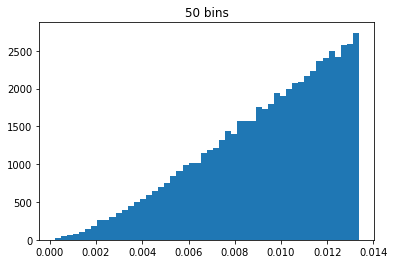

In [11]:
num = 50
plt.hist(edge_lengths, bins=num)
plt.title(str(num) + ' bins')

Text(0.5, 1.0, '50 bins')

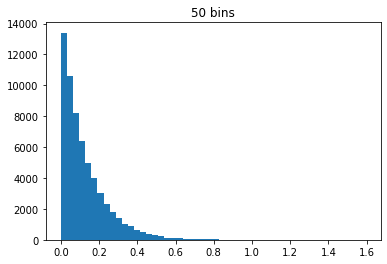

In [12]:
num = 50
plt.hist(np.abs(angle_displacements), bins=num)
plt.title(str(num) + ' bins')


In [15]:
m *28

3.5195877384530267

Text(0.5, 1.0, '50 bins')

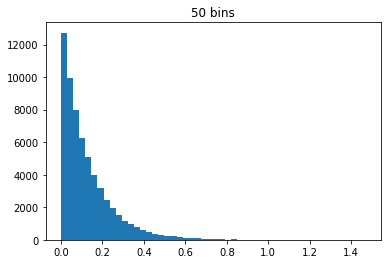

In [14]:
m = np.mean(np.abs(angle_displacements))
r = expon.rvs(size=60896)
r *= m

list(r).append(np.max(np.abs(angle_displacements)))

num = 50
plt.margins()
plt.hist(r, bins=num)
plt.title(str(num) + ' bins')

In [5]:
S_n

array([1.14065965, 1.13834096, 1.13830534, 1.13946738, 1.13336132,
       1.14071186, 1.13838112, 1.14093592, 1.14786091, 1.1464944 ,
       1.14609782, 1.13894584, 1.1416064 , 1.14454823, 1.13838332,
       1.14175267, 1.14296017, 1.1372289 , 1.14524551, 1.13497424,
       1.13353795, 1.13524201, 1.14541707, 1.14050147, 1.13959675,
       1.1372671 , 1.14414012, 1.14146786, 1.14912706, 1.13787113,
       1.14222691, 1.13625095, 1.13919327, 1.13061191, 1.14602729,
       1.13241742, 1.14428629, 1.13289875, 1.13066293, 1.14893331,
       1.1370958 , 1.13972199, 1.13473113, 1.13922506, 1.13302487,
       1.13848705, 1.13951942, 1.13564042, 1.13850168, 1.1438314 ,
       1.13874549, 1.14187018, 1.14483418, 1.14226945, 1.14031181,
       1.14087596, 1.13814483, 1.13638149, 1.13575927, 1.14277963,
       1.13714115, 1.14482025, 1.13598208, 1.14620387, 1.15317248,
       1.1460604 , 1.14012902, 1.13771336, 1.13797856, 1.13963442,
       1.13707689, 1.14365745, 1.14349491, 1.14838882, 1.14153

In [7]:
counts

array([123, 120, 119, 123, 124, 123, 122, 121, 123, 121, 119, 120, 125,
       125, 115, 124, 118, 123, 118, 127, 119, 123, 121, 118, 118, 122,
       123, 117, 122, 121, 123, 122, 120, 123, 118, 121, 118, 119, 121,
       121, 121, 119, 129, 126, 126, 124, 118, 121, 124, 121, 120, 121,
       125, 120, 123, 120, 122, 123, 121, 122, 116, 120, 122, 124, 119,
       122, 120, 124, 117, 122, 121, 118, 121, 130, 124, 125, 127, 117,
       122, 123, 120, 129, 123, 122, 128, 125, 122, 115, 122, 121, 122,
       119, 124, 123, 123, 122, 123, 121, 121, 123, 123, 122, 126, 126,
       122, 126, 127, 120, 129, 120, 121, 122, 122, 123, 122, 121, 124,
       122, 123, 125, 126, 117, 120, 119, 123, 128, 124, 122, 122, 123,
       122, 122, 119, 121, 121, 126, 121, 124, 118, 125, 124, 119, 119,
       122, 122, 125, 120, 123, 122, 125, 125, 123, 122, 126, 122, 117,
       119, 122, 121, 123, 118, 122, 120, 121, 124, 122, 123, 121, 128,
       116, 118, 120, 123, 121, 121, 123, 120, 125, 123, 117, 12

In [146]:
# T_n approaches 1.5 * (true length) n^(1/4)

n = 50000
D = 2

T = (0.8 * (2 ** 0.5)) / (2/3 * r(n,D)) # * math.cos(math.pi / 28.099258924162903))

In [136]:
T

127.6817315198756

In [147]:
lengths = deepcopy(S_n)

Text(0.5, 1.0, '50 bins')

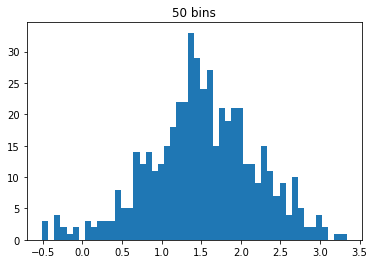

In [95]:
lengths = deepcopy(S_n)
lengths = lengths - ((counts) * (2/3) * r(n,D))
lengths = lengths * (counts ** (1/2))
lengths = lengths  / (2/5)
num = 50
plt.hist(lengths, bins=num)
plt.title(str(num) + ' bins')

Text(0.5, 1.0, '20 bins')

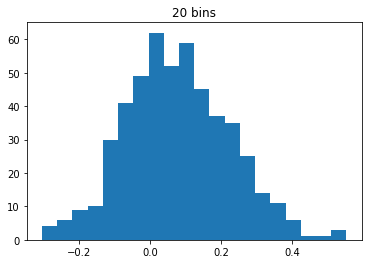

In [153]:
T = (0.8 * (2 ** 0.5)) / (2/3 * r(n,D) * math.cos(math.pi / 28.099258924162903))

lengths = deepcopy(S_n)
lengths = lengths - ((T) * (2/3) * r(n,D))
#lengths /= ((T) * (2/3) * r(n,D))
lengths = lengths * (T ** (1/2))
lengths = lengths  / (2/5)

# new expectation

num = 20
plt.hist(lengths, bins=num)
plt.title(str(num) + ' bins')

Text(0.5, 1.0, '20 bins')

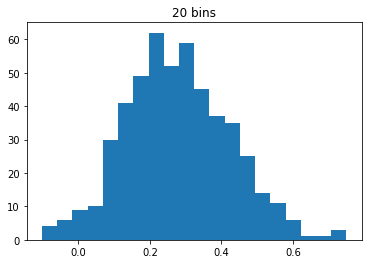

In [150]:
# old expectation

num = 20
plt.hist(lengths, bins=num)
plt.title(str(num) + ' bins')

In [ ]:
T = (0.8 * (2 ** 0.5)) / (2/3 * r(n,D))

lengths = lengths - ((T) * (2/3) * r(n,D))
#lengths /= ((T) * (2/3) * r(n,D))
lengths = lengths * (T ** (1/2))
lengths = lengths  / (2/5)

Text(0.5, 1.0, '50 bins')

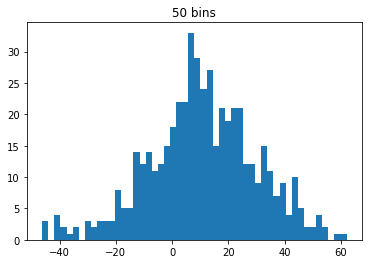

In [97]:
num = 50
plt.hist(lengths, bins=num)
plt.title(str(num) + ' bins')

Text(0.5, 1.0, '13 bins')

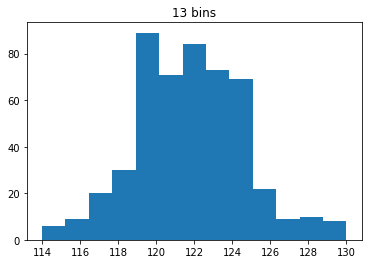

In [99]:
num = 13
plt.hist(counts, bins=num)
plt.title(str(num) + ' bins')

In [90]:
print(np.std(lengths) ** 2)
print(np.mean(lengths))

0.4594819204443511
1.5159302832182158


In [85]:
np.linalg.norm([0.8, 0.8]) / np.mean(lengths)

20.48184976513034

In [77]:
lengths_2 = deepcopy(distances)

In [78]:
lengths_2 = lengths_2 - ((counts+1) * (2/3) * r(n,D))
lengths_2 = lengths_2 * (counts ** (1/2))
lengths_2 = lengths_2 / (2/5)

Text(0.5, 1.0, '50 bins')

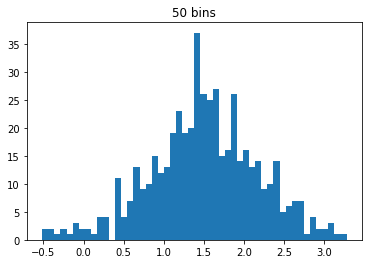

In [79]:
num = 50
plt.hist(lengths_2, bins=num)
plt.title(str(num) + ' bins')

In [50]:
(2/3) * r(n, D)

0.008916537399685627

In [52]:
relatives = S_n / counts

Text(0.5, 1.0, '50 bins')

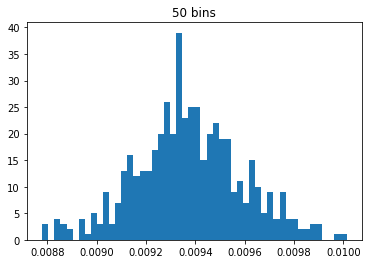

In [53]:
num = 50
plt.hist(relatives, bins=num)
plt.title(str(num) + ' bins')

In [54]:
dictionary = {}
for i in set(counts):
    dictionary[i] = []

for j in range(len(S_n)):
    dictionary[counts[j]].append(S_n[j])

In [55]:
dictionary.keys()

dict_keys([128, 129, 130, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

Text(0.5, 1.0, '10 bins')

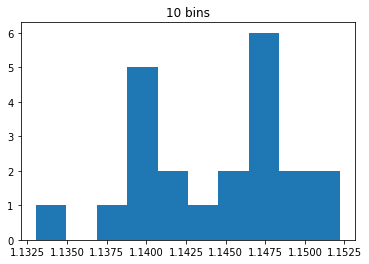

In [60]:
num = 10
plt.hist(dictionary[126], bins=num)
plt.title(str(num) + ' bins')

In [63]:
S_n_true = []

for c in counts:
    s = 0
    for i in range(c):
        s += (r(n,D) * (np.random.uniform()) ** 0.5)
    S_n_true.append(s - c * (2/3) * r(n, D))

Text(0.5, 1.0, '50 bins')

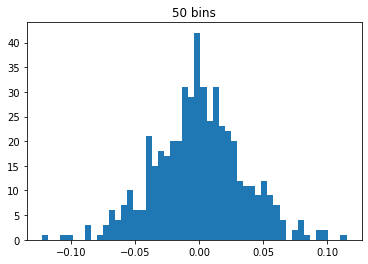

In [64]:
num = 50
plt.hist(S_n_true, bins=num)
plt.title(str(num) + ' bins')